In [1]:
import numpy as np
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import matplotlib.pyplot as plt

In [2]:
#generate dataset
class_1=np.random.multivariate_normal(mean=[1,1],cov=[[0.01,0],[0,0.01]],size=100)
class_0=np.random.multivariate_normal(mean=[-1,-1],cov=[[0.01,0],[0,0.01]],size=100)
lable_1=np.ones((100))
lable_0=np.zeros((100,))
lable1=np.concatenate([lable_1,lable_0])
lable=lable1.reshape(-1,1)
dataset=np.vstack([class_1,class_0])

In [8]:
#initialization 
m=dataset.shape[0]  #sample numbers
n=dataset.shape[1]  #features numbers
alpha=0.001    #learning rate
#2 features , 2 w
epoch=1000
J=[] #cost funstion
X=np.transpose(dataset)    #(2,200)
Y=lable1       #(1,200)=(200,)
b =0.   #bias
dW=np.zeros(shape=(n,1))
#w = np.zeros(shape=(dim, 1), dtype=np.float32)
W=np.random.normal(loc=0.0,scale=0.01,size=(n,1))  #weight init  (n,1)
cost=[]
dW=np.zeros(shape=(n, 1), dtype=np.float32)
db=0.
J=0.

In [5]:
#functions
def sigmoid(z):
    s = 1.0/(1.0 + np.exp(-1.0 * z))
    return s

def calc_gradient(W, b, X, Y):
    Z= np.matmul(W.T, X) + b    #(1,200)
    A=sigmoid(Z)     #(1,200)
    J=(-1.0) * np.mean(np.multiply(Y,np.log(A)) + np.multiply(1.0-Y, np.log(1.0 - A)), axis=1)   
    dW = np.matmul(X, np.transpose(A - Y)) * (1.0/m)  #(2,1)
    db = np.mean((A - Y))
    J= np.squeeze(J)  
    return dW,db,J

def gradient_alg(W, b, X, Y,epoch):
    for i in range(epoch):
        dW,db,J=calc_gradient(W,b,X,Y)
        W=W-(alpha*dW)  #(2,1)
        b=b-alpha*db  #()
        cost.append(J)
    return W,b,cost
 
    
W,b,cost=gradient_alg(W,b,X,Y,epoch)
print("W =", W, '\n bias =' , b ,sep=' ') 

W = [[0.40067473]
 [0.39557914]] 
 bias = -0.0001234429687842917


<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'DataSet')

Text(0.5, 0, 'X_0')

Text(0, 0.5, 'X_1')

Text(0.5, 0.5, 'y=1')

Text(-0.9, -0.5, 'y=0')

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'Cost Function')

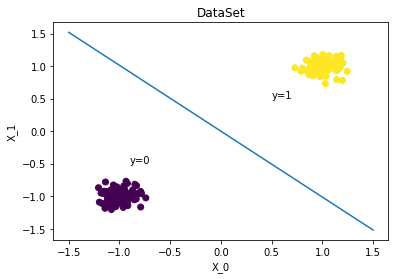

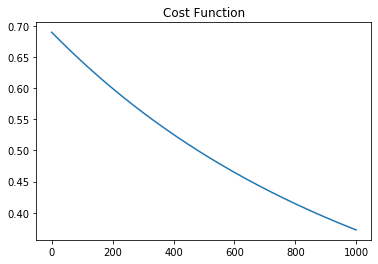

In [7]:
#plot
plt.figure(0)
plt.scatter(dataset[:,0],dataset[:,1],c=lable1)
plt.title('DataSet')
plt.xlabel('X_0')
plt.ylabel('X_1')
plt.text(0.5,0.5,'y=1')
plt.text(-0.9,-0.5,'y=0')
x_1 = np.linspace(-1.5,+1.5,200)
x_2 = -(x_1*W[0,0]+b)/W[1,0]
plt.plot(x_1,x_2);


# plot cost function
plt.figure(1)
plt.plot(cost)
plt.title('Cost Function')
plt.show()